Milestone 1: The curl of a vector field

In the first milestone, you will implement the curl of a vector field using a Fourier spectral method. The goal is to

    …understand how to compute the curl with Fourier-spectral methods.

Curl

In your project you will implement a pseudospectral solver for the Navier-Stokes equations. We will guide you step-by-step through creating this code. This initial milestone explains how to compute the curl, that is a nessary operation for computing the Navier-Stokes equation in the rotational form that we will use for the project.

The curl is a differential operation on a vector field. Given vector field $\vec{u}(\vec{r})$, which for the Navier-Stokes equation will be a velocity field, the curl is defined as
$$ \text{curl}\,\vec{u}=\nabla\times\vec{u}=\begin{pmatrix}\partial_y u_z - \partial_z u_y\\\partial_z u_x - \partial_x u_z\\\partial_x u_y - \partial_y u_x\end{pmatrix} $$
Task 1: Fourier-representation of the curl

Given a Fourier-series of the vector-field $\vec{u}(\vec{r})$, i.e.
$$\vec{u}(\vec{r})=\sum_{\vec{q}} \tilde{\vec{u}}(\vec{q}) e^{i \vec{q}\cdot\vec{r}}$$

with Fourier coefficients $\tilde{\vec{u}}(\vec{q})$, derive the expression for the curl in the Fourier representation.


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from muFFT import FFT

def u(x, y, z):
    return np.array([y**2 * z, -x * y, z**2])

Task 2: Implement a function computing the curl in real-space

Implement a function

$
nb\_ grid\_ pts = (32, 32, 2) \\
fft = FFT(nb\_ grid\_ pts, engine='pocketfft') \\
def \ curl(u\_ cxyz): \\
    """Computes \ the \ curl \ of \ a \ vector \ field \ in \ real \ space.""" \\
    fft... \\
    ... \\
$

that uses the Fourier-representation of the curl derived above to compute the curl of a real-space field. Use µFFT for the computation of the Fourier-transform.


In [5]:
%matplotlib inline
import numpy as np
from muFFT import FFT

nb_grid_pts = (32, 32, 2)
fft = FFT(nb_grid_pts, engine='pocketfft')

u_xyz = fft.real_space_field('first rfield')
u_xyz_hat = fft.fourier_space_field('first ffield')
fsf2 = fft.fourier_space_field('second ffield')
rsf2 = fft.real_space_field('second rfield')


def curl(u_cxyz):

    u_xyz.p = u_cxyz
    fft.fft(u_xyz, u_xyz_hat)

    wavenumber = fft.fftfreq[0].copy() * 2*np.pi
    
    fsf2.p = u_xyz_hat.p / wavenumber**2 * fft.normalisation

    curl_u_cxyz = fft.ifft(fsf2, rsf2)
    
    return curl_u_cxyz
    

In [19]:
%matplotlib inline
import numpy as np
from muFFT import FFT

nb_grid_pts = (32, 32, 2)
fft = FFT(nb_grid_pts, engine='pocketfft')

def curl(u_cxyz):
    u_x, u_y, u_z = u_cxyz
    Lx, Ly, Lz = 32, 32, 2
    N = u_x.shape

    # Create FFT object
    fft = FFT(N)

    # Compute wave numbers
    kx = 2 * np.pi * np.fft.fftfreq(N[0], d=Lx/N[0])
    ky = 2 * np.pi * np.fft.fftfreq(N[1], d=Ly/N[1])
    kz = 2 * np.pi * np.fft.fftfreq(N[2], d=Lz/N[2])

    kx, ky, kz = np.meshgrid(kx, ky, kz, indexing='ij')

    # Fourier transform of the vector field components
    u_x_hat = np.fft.fft(u_x)
    u_y_hat = np.fft.fft(u_y)
    u_z_hat = np.fft.fft(u_z)

    # Compute the components of the curl in the frequency domain
    curl_x_hat = 1j * (ky * u_z_hat - kz * u_y_hat)
    curl_y_hat = 1j * (kz * u_x_hat - kx * u_z_hat)
    curl_z_hat = 1j * (kx * u_y_hat - ky * u_x_hat)

    # Inverse Fourier transform to get the components of the curl in the spatial domain
    curl_x = np.fft.ifft(curl_x_hat).real
    curl_y = np.fft.ifft(curl_y_hat).real
    curl_z = np.fft.ifft(curl_z_hat).real

    curl_xyz = np.array([curl_x, curl_y, curl_z])
    return curl_xyz



Task 3: Test that a constant field has vanishing curl

As the first simplest test, check that a constant field leads to vanishing curl:

$
u_cxyz = np.ones([3, *fft.nb_subdomain_grid_pts])
curlu_cxyz = curl(u_cxyz)
np.testing.assert_allclose(curlu_cxyz, 0)
$


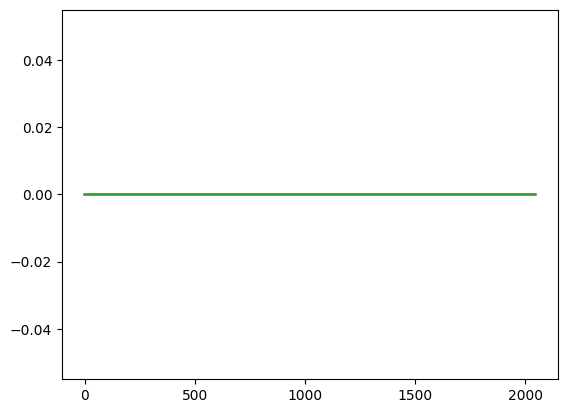

In [20]:
%matplotlib inline
u_cxyz = np.ones([3, *fft.nb_subdomain_grid_pts])
curlu_cxyz = curl(u_cxyz)
np.testing.assert_allclose(curlu_cxyz, 0)

plt.plot(curlu_cxyz[0].flatten(), label='curl(u)_x')
plt.plot(curlu_cxyz[1].flatten(), label='curl(u)_y')
plt.plot(curlu_cxyz[2].flatten(), label='curl(u)_z')


Task 4: Test nonvanishing curl

Compute the curl for the vector field generated by
Plot vector field and curl of the vector field. Which value of the curl would you expect? What do you see?

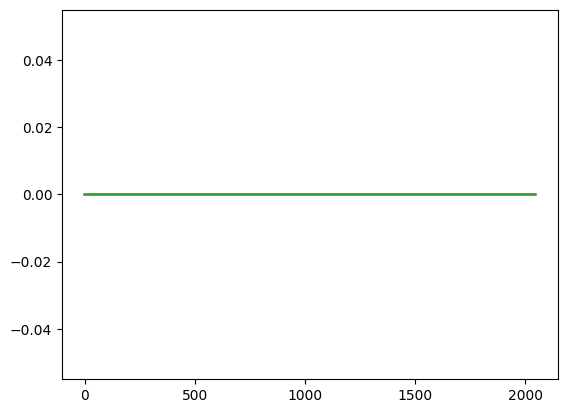

In [21]:
%matplotlib inline
norm = np.array([0, 0, 1])
u_cxyz = np.cross(norm, fft.coords - 0.5, axis=0)

curlu_cxyz = curl(u_cxyz)

plt.plot(curlu_cxyz[0].flatten(), label='curl(u)_x')
plt.plot(curlu_cxyz[1].flatten(), label='curl(u)_y')
plt.plot(curlu_cxyz[2].flatten(), label='curl(u)_z')